In [14]:
#import required stuff

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics


In [4]:
iris = load_iris()
x= iris.data
y = iris.target

In [5]:
print x.shape
print y.shape


(150L, 4L)
(150L,)


In [15]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print metrics.accuracy_score(y_test, y_pred)

0.973684210526


In [30]:
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=7)
scores =cross_val_score(knn,x,y,cv=10,scoring="accuracy")
print scores.mean()

0.966666666667


In [33]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


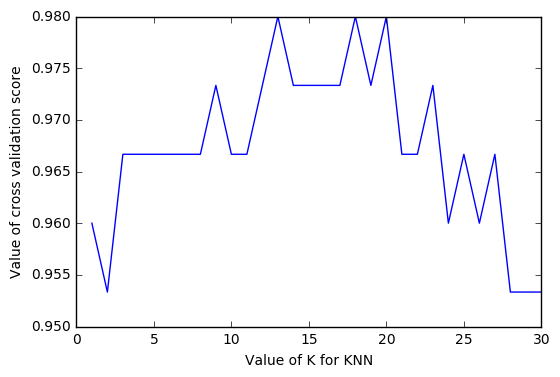

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Value of cross validation score')

In [43]:
#using KNN on the whole set
knn=KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()

0.98


In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

print cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean()

0.953333333333


In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()
data.tail()
linearReg = LinearRegression()
feature_cols=['TV','Radio','Newspaper']
x= data[feature_cols]
y= data['Sales']

print np.sqrt(-cross_val_score(linearReg,x,y,cv=10,scoring='mean_squared_error').mean())

1.74927631268


for a liner regression always remmeber to do np.sqrt of MSE(mean squared error)
